In [251]:
import random
import matplotlib.pyplot as plt
#C-Low

In [252]:
def dice_roll_list(n):
    roll_list = []
    for i in range(n):
        roll_list.append(random.randint(1,6))
    roll_list.sort()
    return roll_list

In [253]:
def get_roll_score():
    roll_list = dice_roll_list(3)
    #print(roll_list)
    roll_set = set(roll_list)
    if len(roll_set) == 3: #No duplicates, check for winner/loser/re-roll
        if roll_set == {1,2,3}:#loser
            score = 0
        elif roll_set == {4,5,6}: #max score
            score = 20
        else:
            return get_roll_score()

    elif len(roll_set) == 2: #Rolled Double
        if roll_list.count(roll_list[0]) == 2:
            score = roll_list[-1]
        else:
            score = roll_list[0]

    else: #Rolled Triple
        score = 10 + roll_list[0]
    return score

In [254]:
def play_round(pot, list_of_player_names):
    round_score_dict = {}
    max_score = 0
    for name in list_of_player_names:
        round_score_dict[name] = get_roll_score()
    #print(round_score_dict)
    winner = [key for key, value in round_score_dict.items() if value == max(round_score_dict.values())]
    if len(winner)>1:
        pot += 1
        return play_round(pot = pot, list_of_player_names = winner)
    return winner[0],pot
        

In [255]:
players = ['Me','the_mark','Professor_Lawrence']
def play_session(rounds, pot, players):
    players_cash = {}
    for player in players:
        players_cash[player] = 0

    for i in range(rounds):
        winner,pot = play_round(1, players)
        winnings = len(players)*pot - pot
        for player in players:
            if player == winner:
                players_cash[player] += winnings
            else:
                players_cash[player] -= pot
    #print(players_cash)
    return players_cash
    

(array([ 23.,  78., 207., 193., 231., 140.,  88.,  28.,   9.,   3.]),
 array([-14. , -10.5,  -7. ,  -3.5,   0. ,   3.5,   7. ,  10.5,  14. ,
         17.5,  21. ]),
 <BarContainer object of 10 artists>)

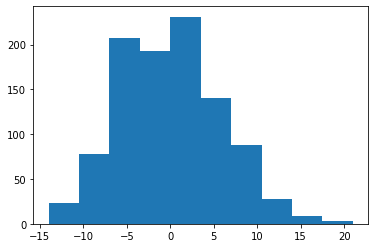

In [256]:
end_of_session_cash = []
for i in range(1000):
    end_of_session_cash.append(play_session(10, 5, players)['Me'])
plt.hist(end_of_session_cash)

(array([  9.,  29.,  91., 179., 233., 212., 142.,  60.,  35.,  10.]),
 array([-52. , -41.5, -31. , -20.5, -10. ,   0.5,  11. ,  21.5,  32. ,
         42.5,  53. ]),
 <BarContainer object of 10 artists>)

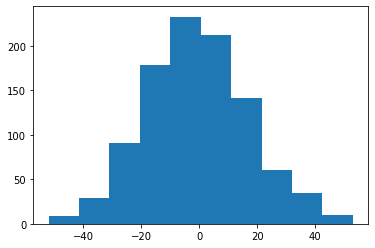

In [257]:
end_of_session_cash = []
for i in range(1000):
    end_of_session_cash.append(play_session(100, 5, players)['Me'])
plt.hist(end_of_session_cash)

(array([  1.,   2.,  14.,  94., 180., 288., 236., 127.,  45.,  13.]),
 array([-223. , -184.4, -145.8, -107.2,  -68.6,  -30. ,    8.6,   47.2,
          85.8,  124.4,  163. ]),
 <BarContainer object of 10 artists>)

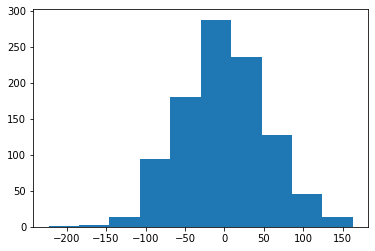

In [258]:
end_of_session_cash = []
for i in range(1000):
    end_of_session_cash.append(play_session(1000, 5, players)['Me'])
plt.hist(end_of_session_cash)